# Derived Benthic Habitat of California's Nearshore Marine Protected Areas (MPAs)
MS 263 Final Project

Caroline Daley | Moss Landing Marine Laboratories 

May 2025

Please install [xDEM](https://xdem.readthedocs.io/en/stable/basic_examples/plot_terrain_attributes.html#sphx-glr-basic-examples-plot-terrain-attributes-py) to run the below code ([xDEM contributors 2024](https://doi.org/10.5281/zenodo.11492983)). 

In [1]:
import matplotlib.pyplot as plt
import xdem
import geopandas as gpd
import os
import rioxarray
import numpy as np
import xarray as xr
from rasterio.features import geometry_mask

### Visualize & Explore Your Data

I import one of the digital elevation models (DEMs) to visualize some of the habitat metrics that I am going to explore in this project. Running this code also allows me to check that the xDEM package is running smoothly and that the outputs are what I might expect! The below code is adopted from the ['Terrain Attributes'](https://xdem.readthedocs.io/en/stable/basic_examples/plot_terrain_attributes.html#sphx-glr-basic-examples-plot-terrain-attributes-py) tutorial on the xDEM website. 

In [4]:
pigeon_point_file = "C:\\Users\\FELAB\\Documents\\MS263\\Data\\MASTER_DEM_TIFs\\Bathymetry_OffshoreBodegaHead.tif"
pigeon_point_DEM = xdem.DEM(pigeon_point_file)

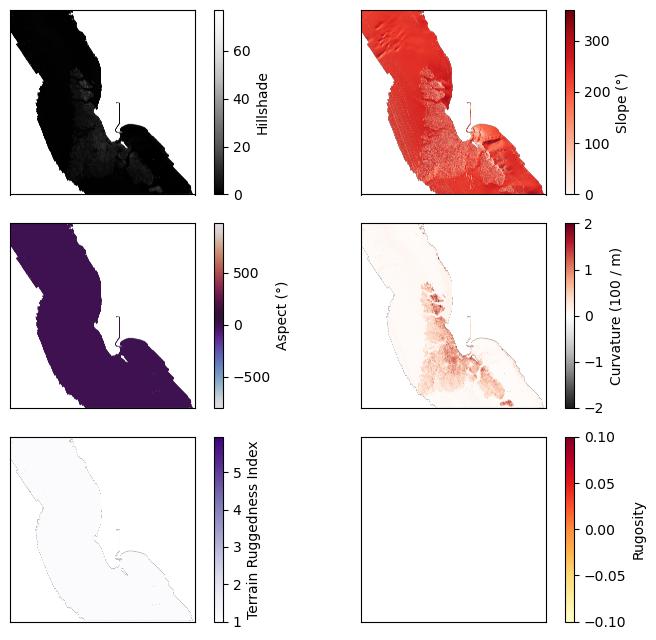

In [5]:
attributes = xdem.terrain.get_terrain_attribute(
    pigeon_point_DEM.data,
    resolution=pigeon_point_DEM.res,
    attribute=["slope", "aspect", "curvature", "terrain_ruggedness_index", "rugosity", "fractal_roughness"],
)

plt.figure(figsize=(8, 6.5))

plt_extent = [pigeon_point_DEM.bounds.left, pigeon_point_DEM.bounds.right, pigeon_point_DEM.bounds.bottom, pigeon_point_DEM.bounds.top]

cmaps = ["Greys_r", "Reds", "twilight", "RdGy_r", "Purples", "YlOrRd"]
labels = ["Hillshade", "Slope (°)", "Aspect (°)", "Curvature (100 / m)", "Terrain Ruggedness Index", "Rugosity"]
vlims = [(None, None) for i in range(6)]
vlims[3] = [-2, 2]

for i in range(6):
    plt.subplot(3, 2, i + 1)
    plt.imshow(attributes[i].squeeze(), cmap=cmaps[i], extent=plt_extent, vmin=vlims[i][0], vmax=vlims[i][1])
    cbar = plt.colorbar()
    cbar.set_label(labels[i])
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

## Prepare for Analysis

### Import DEMs and Shapfiles

Import CCFRP gridcells from local folder.

In [7]:
grid_cells_shp = 'C:\\Users\\FELAB\\Documents\\MS263\\Data\\Shapefiles\\CCFRP Gridcells\\CCFRP_Grid_Cells_2021.shp'
grid_cells = gpd.read_file(grid_cells_shp)

Link to the folder where the raw DEM .tif files downloaded from the California Seafloor Mapping Program are housed. Make a list of the DEMs I will be working with. 

In [8]:
dem_folder = "C:\\Users\\FELAB\\Documents\\MS263\\Data\\MASTER_DEM_TIFs"
dem_list = []

for file_name in os.listdir(dem_folder):
    if file_name[-4:] == '.tif':
        dem_list.append(file_name)

dem_list.sort()

print(dem_list)

['Bathymetry_OffshoreBodegaHead.tif', 'Bathymetry_OffshoreCapeMendocino.tif', 'Bathymetry_OffshoreFortRoss.tif', 'Bathymetry_OffshorePigeonPoint.tif', 'Bathymetry_OffshorePointBuchon.tif', 'Bathymetry_OffshorePointConception.tif', 'Bathymetry_OffshoreSaltPoint.tif', 'Bathymetry_OffshoreSanGregorio.tif']


### Define Output Directory 

Define the folder to export derived habitat metrics. 

In [9]:
output_dir = "C:\\Users\\FELAB\\Documents\\MS263\\Python_Habitat_Metrics"
os.makedirs(output_dir, exist_ok=True)

## Calculate Habitat Attributes Using xDEM

Define which habitat attributes I would like to calculate. 

In [9]:
habitat_attributes = ["slope", "aspect", "curvature", "terrain_ruggedness_index", "rugosity", "fractal_roughness"]

Calculate my specified habitat attributes for each of my DEMs of interest. The derived habitat attribtues will be exported into the above identified directory.

In [11]:
for dem_name in dem_list:
    dem_path = os.path.join(dem_folder, dem_name)
    print(f"Calculating habitat attributes for: {dem_name}")

    dem = xdem.DEM(dem_path)

    for attribute in habitat_attributes:
        data_np = xdem.terrain.get_terrain_attribute(
            dem.data,  
            resolution=dem.res,
            attribute=attribute
        )

        # Ensure data_np has the same dtype as the original DEM data
        data_np = data_np.astype(dem.data.dtype) 

        # Create a new DEM object to hold the computed attribute
        ddem = dem.copy() 

        # Update the data of the copy with the computed terrain attribute
        ddem.data = data_np 

        # Save the computed attribute directly to a file
        out_path = os.path.join(output_dir, f"{os.path.splitext(dem_name)[0]}_{attribute}.tif")
        ddem.save(out_path)

print("Calculation complete.")

Calculating habitat attributes for: Bathymetry_OffshoreBodegaHead.tif
Calculating habitat attributes for: Bathymetry_OffshoreCapeMendocino.tif
Calculating habitat attributes for: Bathymetry_OffshoreFortRoss.tif
Calculating habitat attributes for: Bathymetry_OffshorePigeonPoint.tif
Calculating habitat attributes for: Bathymetry_OffshorePointBuchon.tif
Calculating habitat attributes for: Bathymetry_OffshorePointConception.tif
Calculating habitat attributes for: Bathymetry_OffshoreSaltPoint.tif
Calculating habitat attributes for: Bathymetry_OffshoreSanGregorio.tif
Calculation complete.


### Sanity Check
Check out the slope product that you generated! 


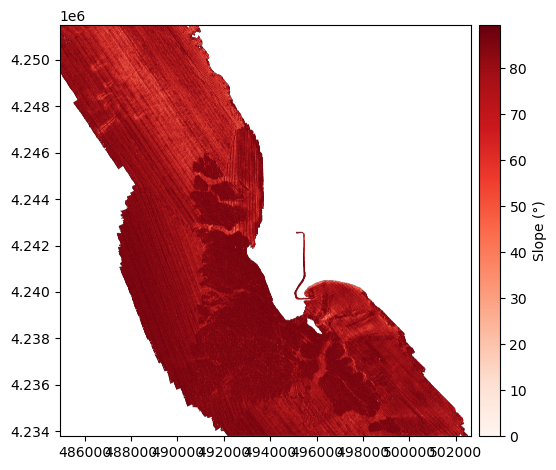

In [12]:
test_file = "C:\\Users\\FELAB\\Documents\\MS263\\Python\\xDEM_Habitat_Metrics\\Bathymetry_OffshoreBodegaHead_aspect.tif"
test = xdem.DEM(test_file)

slope = test.slope()
slope.plot(cmap="Reds", cbar_title="Slope (°)")